<a href="https://colab.research.google.com/github/Cristiand056/practicas_IA/blob/main/kidney_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub
import os

path = kagglehub.dataset_download("miadul/kidney-disease-risk-dataset")

In [3]:
import pandas as pd
import numpy as np

path_archivo = os.path.join(path, "kidney_disease_dataset.csv")

df = pd.read_csv(path_archivo)
df.head()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,0,1,46.8,1622.0,1,0
1,34,1.79,17.1,0,0,43.8,1428.0,1,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0


#Explorando los datos

In [4]:
df.describe()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,54.159288,1.305638,18.813672,0.406684,0.498264,68.953863,1309.189670,0.508681,0.013455
std,20.513729,0.789594,10.508358,0.491322,0.500106,24.660191,491.951914,0.500033,0.115237
min,20.000000,0.300000,5.000000,0.000000,0.000000,5.000000,100.000000,0.000000,0.000000
25%,36.000000,0.620000,9.975000,0.000000,0.000000,51.300000,967.750000,0.000000,0.000000
50%,54.000000,1.240000,18.200000,0.000000,0.000000,69.150000,1295.500000,1.000000,0.000000
75%,72.000000,1.842500,26.000000,1.000000,1.000000,86.300000,1633.500000,1.000000,0.000000
max,90.000000,4.130000,61.900000,1.000000,1.000000,120.000000,2899.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2304 non-null   int64  
 1   Creatinine_Level  2304 non-null   float64
 2   BUN               2304 non-null   float64
 3   Diabetes          2304 non-null   int64  
 4   Hypertension      2304 non-null   int64  
 5   GFR               2304 non-null   float64
 6   Urine_Output      2304 non-null   float64
 7   CKD_Status        2304 non-null   int64  
 8   Dialysis_Needed   2304 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 162.1 KB


In [6]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
porcen_tar = df['CKD_Status'].value_counts(normalize=True) * 100
porcen_tar

,proportion
CKD_Status,
1,50.868056
0,49.131944


In [8]:
px.box(df, x='CKD_Status', y='Urine_Output')

In [9]:
px.scatter(df, y='Urine_Output')

In [10]:
px.box(df ,x='CKD_Status', y='Creatinine_Level')


In [11]:
px.box(df, x='CKD_Status', y='BUN')

#Outliners

In [12]:
!pip install alibi-detect

In [18]:
from alibi_detect.od import IForest

od = IForest(threshold=0., n_estimators=500)
od.fit(df[['Age','Creatinine_Level', 'GFR', 'Urine_Output','BUN']])
preds = od.predict(df[['Age','Creatinine_Level', 'GFR', 'Urine_Output','BUN']], return_instance_score=True)
df['Valores_atípicos'] = preds['data']['is_outlier']

In [19]:
df

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed,Valores_atípicos
0,71,0.30,40.9,0,1,46.8,1622.0,1,0,1
1,34,1.79,17.1,0,0,43.8,1428.0,1,0,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2299,89,1.11,5.0,1,0,55.1,1344.0,1,0,0
2300,89,0.30,5.0,0,0,47.5,2156.0,1,0,1
2301,84,0.30,7.3,1,0,120.0,1353.0,0,0,1
2302,24,1.58,26.4,1,0,75.6,1067.0,0,0,0


In [21]:
df.value_counts('Valores_atípicos')

,count
Valores_atípicos,
0,1625
1,679


In [22]:
outliers = df.loc[(df['Valores_atípicos']==1)]#todas las filas
dataset = df.loc[(df['Valores_atípicos']==0)]#todas las columnas
dataset=dataset.drop(['Valores_atípicos'],axis=1)
df_ou  = dataset
df_ou.sample(10)

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
1820,27,2.02,5.0,0,0,81.0,917.0,0,0
1897,55,2.30,5.0,1,1,73.1,1752.0,0,0
2025,39,1.73,5.0,1,0,55.7,979.0,1,0
2059,51,1.32,30.4,1,0,52.4,480.0,1,0
1773,44,0.76,10.0,0,0,108.2,1661.0,0,0
1488,89,1.77,8.0,1,0,41.8,1486.0,1,0
675,45,0.30,10.1,0,0,40.8,877.0,1,0
1145,58,0.51,5.0,1,0,82.3,1498.0,0,0
202,35,1.94,20.7,1,1,28.1,1639.0,1,0
1302,51,1.97,5.0,0,1,53.7,1430.0,1,0


In [102]:
#CKD_Status	Target (0/1)	1 if patient has chronic kidney disease, else 0.

X=df.drop(columns=['CKD_Status','Valores_atípicos'], axis=1)
X_out = df_ou.drop(columns=['CKD_Status'], axis=1)
y=df['CKD_Status']
y_out = df_ou['CKD_Status']

#Modelado

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Metrícas de desempeño

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, r2_score, mean_squared_error, mean_absolute_error

##Baseline

In [105]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

y_pred = dummy.predict(X_test)

print(r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

-1.0308370044052864
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.49      1.00      0.66       227

    accuracy                           0.49       461
   macro avg       0.25      0.50      0.33       461
weighted avg       0.24      0.49      0.32       461

[[  0 234]
 [  0 227]]


##Prueba keras

In [116]:
from tensorflow import keras
from keras import layers
from keras import regularizers

#definir las capas de entrada
input_layer=layers.Input(shape=(8,))

#definir las capas ocultas
hidden_layer1 = layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(input_layer)
hidden_layer1 = layers.Dropout(0.2)(hidden_layer1)

hidden_layer2 = layers.Dense(64, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(hidden_layer1)
hidden_layer2 = layers.Dropout(0.2)(hidden_layer2)

hidden_layer3 = layers.Dense(32, activation='sigmoid')(hidden_layer2)

#definir la capa de salida
output_layer=layers.Dense(1)(hidden_layer3)

#generar el modelo
modelo_k=keras.Model(inputs=input_layer, outputs=output_layer)

#compilar el modelo
modelo_k.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'recall'])

modelo_k.fit(X_train, y_train, epochs=25, batch_size=32)

loss=modelo_k.evaluate(X_test,y_test)
print('Perdida: ',loss)

Epoch 1/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4615 - loss: 2.8807 - recall: 0.0773
Epoch 2/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4801 - loss: 0.3466 - recall: 0.6329
Epoch 3/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5104 - loss: 0.3234 - recall: 0.6082
Epoch 4/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5149 - loss: 0.3140 - recall: 0.5735
Epoch 5/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5304 - loss: 0.3086 - recall: 0.5317
Epoch 6/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5804 - loss: 0.2877 - recall: 0.6248
Epoch 7/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6343 - loss: 0.2744 - recall: 0.6367
Epoch 8/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7255 - loss: 0.2452 - recall: 0.6961
Epoch 9/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7338 - loss: 0.2286 - recall: 0.7224
Epoch 10/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7603 - loss: 0.2241 - reca

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Error promedio cuadratico:  0.1366594433784485
Error absoluto cuadratico:  0.1366594433784485
Accuracy: 0.8633405639913232
R2: 0.45323628187179565
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       234
           1       0.87      0.85      0.86       227

    accuracy                           0.86       461
   macro avg       0.86      0.86      0.86       461
weighted avg       0.86      0.86      0.86       461

[[206  28]
 [ 35 192]]


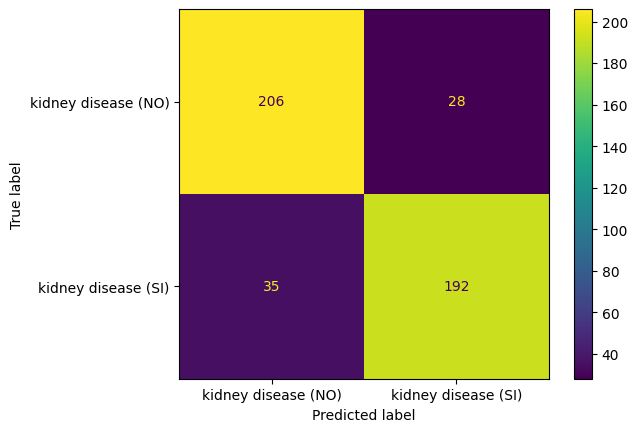

In [117]:
from sklearn.metrics import mean_absolute_error
predicciones=modelo_k.predict(X_test).round()
#print(predicciones)

mse=mean_squared_error(y_test,predicciones)
mae=mean_absolute_error(y_test,predicciones)
print('Error promedio cuadratico: ',mse)
print('Error absoluto cuadratico: ',mae)
print(f'Accuracy: {accuracy_score(y_test, predicciones)}')
print(f'R2: {r2_score(y_test, predicciones)}')
print(classification_report(y_test, predicciones))
matrix = confusion_matrix(y_test, predicciones)
print(matrix)
visualizacion = ConfusionMatrixDisplay(matrix, display_labels=['kidney disease (NO)', 'kidney disease (SI)'])
visualizacion.plot()

##Arbol

Accuracy: 1.0
R2: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       227

    accuracy                           1.00       461
   macro avg       1.00      1.00      1.00       461
weighted avg       1.00      1.00      1.00       461

[[234   0]
 [  0 227]]
Error promedio cuadratico:  0.0
Error absoluto cuadratico:  0.0


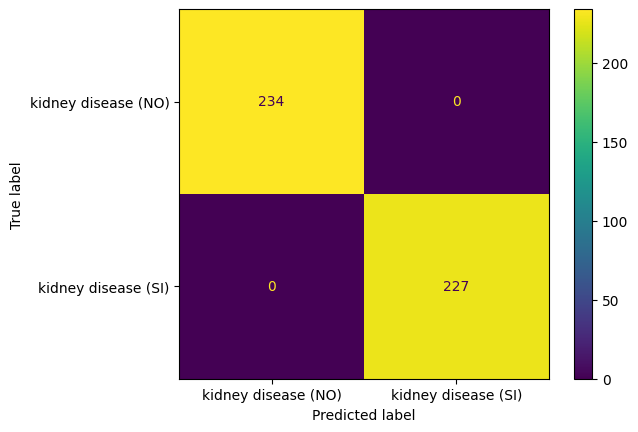

In [108]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(max_depth=5)
arbol.fit(X_train, y_train)

y_pred = arbol.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
visualizacion = ConfusionMatrixDisplay(matrix, display_labels=['kidney disease (NO)', 'kidney disease (SI)'])
visualizacion.plot()
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('Error promedio cuadratico: ',mse)
print('Error absoluto cuadratico: ',mae)

##Prueba sin outliners

In [118]:
X_out_train, X_out_test, y_out_train, y_out_test = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

#definir las capas de entrada
input_layer=layers.Input(shape=(8,))

#definir las capas ocultas
hidden_layer1 = layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(input_layer)
hidden_layer1 = layers.Dropout(0.2)(hidden_layer1)

hidden_layer2 = layers.Dense(64, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(hidden_layer1)
hidden_layer2 = layers.Dropout(0.2)(hidden_layer2)

hidden_layer3 = layers.Dense(32, activation='sigmoid')(hidden_layer2)

#definir la capa de salida
output_layer=layers.Dense(1)(hidden_layer3)

#generar el modelo
modelo_k=keras.Model(inputs=input_layer, outputs=output_layer)

#compilar el modelo
modelo_k.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'recall'])

modelo_k.fit(X_out_train, y_out_train, epochs=25, batch_size=32)

loss=modelo_k.evaluate(X_out_test,y_out_test)
print('Perdida: ',loss)

Epoch 1/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5458 - loss: 0.4061 - recall: 0.3249
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5793 - loss: 0.3047 - recall: 0.2294
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6276 - loss: 0.2740 - recall: 0.3720
Epoch 4/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7162 - loss: 0.2348 - recall: 0.5889
Epoch 5/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7658 - loss: 0.2113 - recall: 0.6479
Epoch 6/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7467 - loss: 0.2108 - recall: 0.6311
Epoch 7/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8000 - loss: 0.1809 - recall: 0.6901
Epoch 8/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7919 - loss: 0.1825 - recall: 0.6973
Epoch 9/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7694 - loss: 0.1907 - recall: 0.6773
Epoch 10/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8042 - loss: 0.1790 - reca

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Error promedio cuadratico:  0.190889373421669
Error absoluto cuadratico:  0.190889373421669
Accuracy: 0.8091106290672451
R2: 0.23626655340194702
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       234
           1       0.95      0.64      0.77       227

    accuracy                           0.81       461
   macro avg       0.85      0.81      0.80       461
weighted avg       0.84      0.81      0.80       461

[[227   7]
 [ 81 146]]


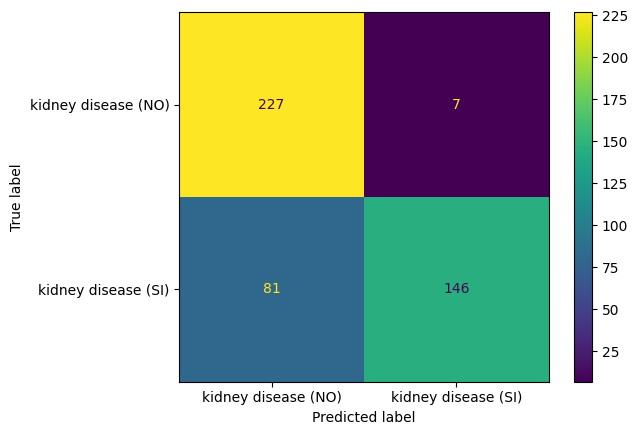

In [119]:
predicciones=modelo_k.predict(X_test).round()
#print(predicciones)

mse=mean_squared_error(y_test,predicciones)
mae=mean_absolute_error(y_test,predicciones)
print('Error promedio cuadratico: ',mse)
print('Error absoluto cuadratico: ',mae)
print(f'Accuracy: {accuracy_score(y_test, predicciones)}')
print(f'R2: {r2_score(y_test, predicciones)}')
print(classification_report(y_test, predicciones))
matrix = confusion_matrix(y_test, predicciones)
print(matrix)
visualizacion = ConfusionMatrixDisplay(matrix, display_labels=['kidney disease (NO)', 'kidney disease (SI)'])
visualizacion.plot()

In [120]:
import joblib

joblib.dump(arbol, 'modelo_arbol_champion.pkl')
joblib.dump(od, 'modelo_outliners.pkl')
joblib.dump(modelo_k, 'modelo_red_neuronal.pkl')

['modelo_red_neuronal.pkl']